In [1]:
import pandas as pd

police_killings = pd.read_csv('police_killings.csv', encoding='ISO-8859-1')
print(police_killings.columns)
police_killings.head()

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


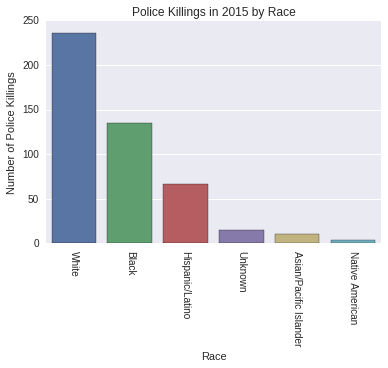

In [2]:
# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

deaths_by_race = police_killings.loc[:, 'raceethnicity'].value_counts()
x = deaths_by_race.index.tolist()
y = deaths_by_race.tolist()
fig1 = sns.barplot(x=x, y=y)
fig1.set_xticklabels(x, rotation=270)
fig1.set_xlabel('Race')
fig1.set_ylabel('Number of Police Killings')
fig1.set_title('Police Killings in 2015 by Race')

print(deaths_by_race)

sns.plt.show()

Surprisingly, more white people were killed by police than black and hispanic/latino people combined.

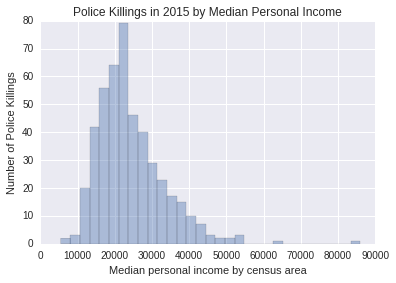

In [3]:
# how do you delete rows from a pandas series based on a conditional?

income_vector = (police_killings['p_income'] != '-')
income_rows = police_killings[income_vector]
income = income_rows.loc[:, 'p_income']
income = income.astype(int)

fig2 = sns.distplot(income, hist=True, kde=False)
fig2.set_xlabel('Median personal income by census area')
fig2.set_ylabel('Number of Police Killings')
fig2.set_title('Police Killings in 2015 by Median Personal Income')
sns.plt.show()

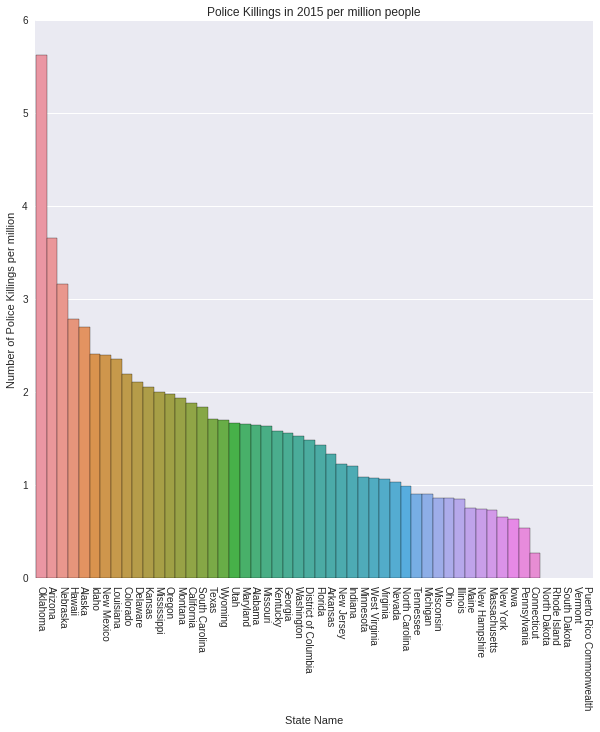

In [4]:
state_pop = pd.read_csv('state_population.csv')

counts = police_killings.loc[:, 'state_fp'].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings":counts})

states = states.merge(state_pop, on='STATE', how='outer')
states = states[states.NAME != 'United States']
states.loc[:, 'pop_millions'] = states.apply(lambda row: row['POPESTIMATE2015']/1000000, axis=1)
states.loc[:, 'shootings_per_million'] = states.apply(lambda row: row['shootings']/row['pop_millions'], axis=1)

states.sort_values(by='shootings_per_million', ascending=False, inplace=True)

# edit the matplotlib configuration file
# must be done before instantiating the image
plt.rcParams['figure.figsize']=(10,10)

fig3 = sns.barplot(x=states['NAME'], y=states['shootings_per_million'])
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=270)
fig3.set_title('Police Killings in 2015 per million people')
fig3.set_xlabel('State Name')
fig3.set_ylabel('Number of Police Killings per million')

# these lines don't do anything, as the width is set to 1.
for bar in fig3.patches:
    bar.set_width(1)

# 'module' object has no attribute 'fig3'
# plt.fig3(figsize=(10, 10))

# 'module' object has no attribute 'fig3'
# fig3.set_size_inches(18.5, 10.5)

sns.plt.show()

# Figure out how to move the bars further apart to show the xlabels nicely


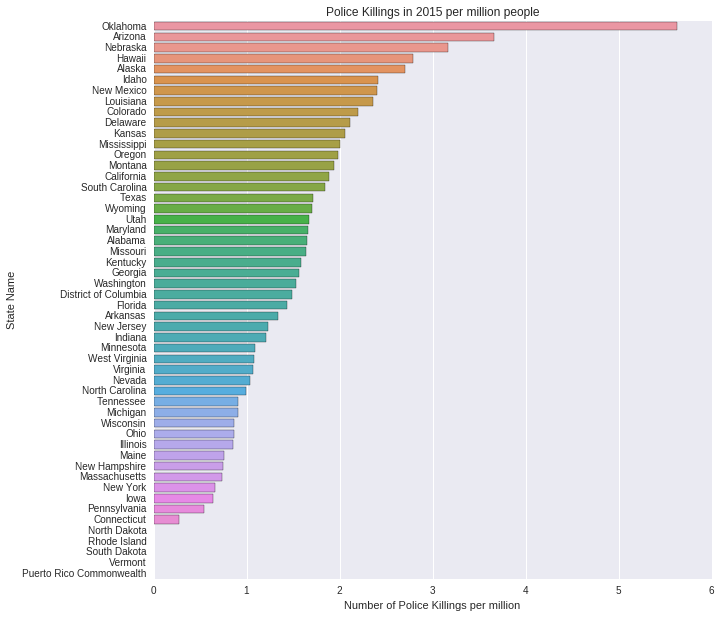

In [5]:
# much more legible and simpler to plot the 'shootings by state' 
# horizontally

fig4 = sns.barplot(x=states['shootings_per_million'], y=states['NAME'])
fig4.set_xlabel('Number of Police Killings per million')
fig4.set_ylabel('State Name')
fig4.set_title('Police Killings in 2015 per million people')

sns.plt.show()

In [6]:
pk_vector = (police_killings['share_white'] != '-') & (police_killings['share_black'] != '-') \
    & (police_killings['share_hispanic'] != '-')
    
pk = police_killings[pk_vector]
pk.loc[:, ['share_white', 'share_black', 'share_hispanic']].astype(float)

# get the top 10 states from 'states'
# # to select rows, either reset the index and use .loc, 
# # or don't reset the index and use .iloc to select rows, 
# # and .loc to select columns
# #(ix is dangerous because it might interpret the rows as labels)

# states.reset_index(drop=True, inplace=True)
top_10_states = states.iloc[0:9, :]
top_10_states = top_10_states.loc[:, 'STATE'].tolist()
pk_top_10_states = pk[pk['state_fp'].isin(top_10_states)]

# slice last 10 rows, all columns
bottom_10_states = states.iloc[-10:, :]
bottom_10_states = bottom_10_states.loc[:, 'STATE'].tolist()
pk_bottom_10_states = pk[pk['state_fp'].isin(bottom_10_states)]


# columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]
# print(pk_top_10_states[columns].describe)
print("Rows from police_killings with the top 10 states")
pk_top_10_states

Rows from police_killings with the top 10 states


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79,15523,20833.0,53596,0.388704,1.0,1.0,58,0.073651,0.102955
21,Andre Murphy Sr,42,Male,Black,January,7,2015,1223 Omaha Ave,Norfolk,NE,...,2.9,23342,54809.0,46566,1.177018,4.0,3.0,10.3,0.035221,0.258886
24,Andrew Jackson,26,Male,White,April,29,2015,1200 W Florida Ave,Chickasha,OK,...,9.7,17695,32034.0,49637,0.645365,1.0,1.0,20.3,0.011335,0.169402
42,Aurelio Duarte,40,Male,Hispanic/Latino,March,8,2015,3632 SW 38th St,Oklahoma City,OK,...,56.6,17225,32860.0,45215,0.726750,2.0,1.0,25.1,0.142747,0.035339
49,Billy Grimm,44,Male,White,May,3,2015,Arenal Rd SW and Tapia Blvd SW,Albuquerque,NM,...,81.5,21170,39651.0,48801,0.812504,2.0,2.0,25.8,0.076501,0.162602
50,Billy Patrick,29,Male,White,April,26,2015,NaN,Bunch,OK,...,1.7,20901,35022.0,32556,1.075746,4.0,2.0,19.1,0.042686,0.139617
55,Brandon Rapp,31,Male,White,March,18,2015,9000 Charles Way,Middleton,ID,...,8.1,28125,58600.0,42105,1.391759,5.0,4.0,9.5,0.095137,0.226443
59,Brian Fritze,45,Male,White,February,10,2015,I-70 and US-6,Glenwood Springs,CO,...,28,35827,59051.0,57022,1.035583,3.0,4.0,7.7,0.044583,0.380768
63,Bruce Zalonka,46,Male,Asian/Pacific Islander,May,12,2015,1031 Nuuanu Ave,Honolulu,HI,...,1,35788,62594.0,72764,0.860233,2.0,4.0,14.4,0.055156,0.510619


In [7]:
print("Rows from police_killings with the bottom 10 states")
pk_bottom_10_states

Rows from police_killings with the bottom 10 states


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
31,Angelo West,41,Male,Black,March,27,2015,Humboldt Ave and Ruthven St,Roxbury,MA,...,35.2,14995,20388.0,53540,0.380799,1.0,1.0,41.3,0.220398,0.182336
35,Anthony Gomez Jr,29,Male,Black,May,19,2015,305 E Walnut St,Lancaster,PA,...,37.1,21868,42027.0,56483,0.744065,1.0,2.0,9.3,0.206855,0.172319
44,Autumn Steele,34,Female,White,January,6,2015,104 N Garfield Ave,Burlington,IA,...,6.8,15488,26964.0,42451,0.635179,1.0,1.0,26.3,0.105964,0.096565
89,Dalton Branch,51,Male,Black,May,26,2015,530 Stanley Ave,New York,NY,...,15.6,21344,34545.0,46085,0.749593,2.0,2.0,20.1,0.106880,0.109860
110,David Kassick,59,Male,White,February,2,2015,36 Grandview Rd,Hanover,PA,...,5.9,30491,65581.0,58745,1.116367,4.0,4.0,7.4,0.034011,0.267044
113,David Schwalm,58,Male,White,May,8,2015,168 Auringer Rd,Constantania,NY,...,2,23883,49360.0,48051,1.027242,3.0,3.0,12.9,0.158177,0.147076
115,David Werblow,41,Male,White,March,15,2015,134 Burban Dr,Branford,CT,...,8.8,41609,64063.0,61996,1.033341,3.0,4.0,8.3,0.071680,0.382334
122,Denis Reyes,40,Male,Hispanic/Latino,May,15,2015,274 E 194th St,New York,NY,...,71.9,15656,26509.0,34388,0.770879,2.0,1.0,36.7,0.176022,0.102324
124,Denzel Brown,21,Male,Black,March,22,2015,1851 Sunrise Hwy,Bay Shore,NY,...,39.6,30784,72218.0,87763,0.822875,1.0,4.0,4.4,0.109368,0.240339
135,Donald 'Dontay' Ivy,39,Male,Black,April,2,2015,Lark St and Second St,Albany,NY,...,13.5,14520,20665.0,59394,0.347931,1.0,1.0,44.5,0.125672,0.138646
